📊 Visualisasi Data

Mata Kuliah: Data Mining

Tujuan:
Menampilkan hasil eksplorasi dan visualisasi data


Langkah-langkah utama:

1. Import dataset dari Google Drive

2. Pembersihan data (cleansing)

3. Visualisasi persebaran dan tren data

4. Analisis hasil visualisasi

# **1. Setup & Import Library**

In [ ]:
# ================================================
# 📊 VISUALISASI DATA
# ================================================

# 1. Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# **2. Import Dataset dari Google Drive**

In [ ]:
from google.colab import drive


# Styling untuk tampilan grafik
sns.set(style="whitegrid", palette="coolwarm")
plt.rcParams['figure.figsize'] = (10, 6)

#path file
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Colab Notebooks/retail_raw_reduced.csv"
df = pd.read_csv(file_path, encoding="latin1")

# Cek data
df.head()

Mounted at /content/drive


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


Cek Dataset apakah sudah benar benar ter import

In [ ]:
import datetime
# --- Tambahkan kolom order_month menggunakan datetime dan lambda ---
df['order_month'] = df['order_date'].apply(
    lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime("%Y-%m")
)

# --- Tampilkan 5 baris acak agar datanya tidak sama dengan contoh ---
print(df.sample(5))

      order_id  order_date  customer_id             city     province  \
4100   1707988  2019-10-28        17652    Jakarta Pusat  DKI Jakarta   
1746   1721239  2019-11-26        13461  Jakarta Selatan  DKI Jakarta   
1674   1727260  2019-12-06        17841    Jakarta Utara  DKI Jakarta   
888    1736557  2019-12-22        17841    Jakarta Utara  DKI Jakarta   
4002   1674880  2019-07-23        13656           Bekasi   Jawa Barat   

     product_id    brand  quantity  item_price order_month  
4100      P3080  BRAND_R         6     1045000     2019-10  
1746      P1902  BRAND_J        30      740000     2019-11  
1674      P3180  BRAND_S         1     2375000     2019-12  
888       P2587  BRAND_P         1     1045000     2019-12  
4002      P1875  BRAND_J        24       79000     2019-07  


#  3. Menambahkan GMV


In [ ]:
# --- Tambahkan kolom 'GMV' (Gross Merchandise Value = quantity × item_price) ---
df['GMV'] = df['quantity'] * df['item_price']

# --- Tampilkan 5 baris acak agar hasil berbeda tiap kali dijalankan ---
print(df.sample(5))

      order_id  order_date  customer_id             city     province  \
4297   1701550  2019-10-13        14769           Bekasi   Jawa Barat   
2897   1698574  2019-10-04        14388    Jakarta Pusat  DKI Jakarta   
2106   1716952  2019-11-17        14629  Jakarta Selatan  DKI Jakarta   
4808   1735564  2019-12-19        17812    Jakarta Barat  DKI Jakarta   
4274   1734223  2019-12-17        17590    Jakarta Pusat  DKI Jakarta   

     product_id    brand  quantity  item_price order_month       GMV  
4297      P0970  BRAND_C         4     2865000     2019-10  11460000  
2897      P1793  BRAND_H        12      590000     2019-10   7080000  
2106      P1802  BRAND_H         1     1745000     2019-11   1745000  
4808      P1891  BRAND_J         1      740000     2019-12    740000  
4274      P2518  BRAND_P         1     2025000     2019-12   2025000  


In [ ]:
##Checking duplicate apakah ada data yang duplicate dan menghilangkan data yang duplikat
df.duplicated().sum()
df = df.drop_duplicates()


# 4. Menambahkan Data Agregat


In [ ]:
# --- Membuat data agregat berdasarkan order_month ---
# Misalnya: total GMV, jumlah transaksi, dan rata-rata item_price per bulan
df_agg = df.groupby('order_month').agg({
    'GMV': 'sum',
    'order_id': 'nunique',   # menghitung jumlah transaksi unik
    'item_price': 'mean'
}).reset_index()

# --- Ubah nama kolom agar lebih jelas ---
df_agg.rename(columns={
    'GMV': 'total_GMV',
    'order_id': 'total_transactions',
    'item_price': 'avg_item_price'
}, inplace=True)

# --- Tampilkan hasil agregat ---
print("Data agregat per bulan:")
print(df_agg)


Data agregat per bulan:
  order_month   total_GMV  total_transactions  avg_item_price
0     2019-07  3524041000                 394    1.025427e+06
1     2019-08  4452923000                 426    9.405505e+05
2     2019-09  3947002000                 348    9.697456e+05
3     2019-10  6719937000                 610    9.492265e+05
4     2019-11  6182229000                 598    8.970152e+05
5     2019-12  8148235000                 858    8.989417e+05


#  5. Membuat Line Chat Pertumbuhan Pada GMV


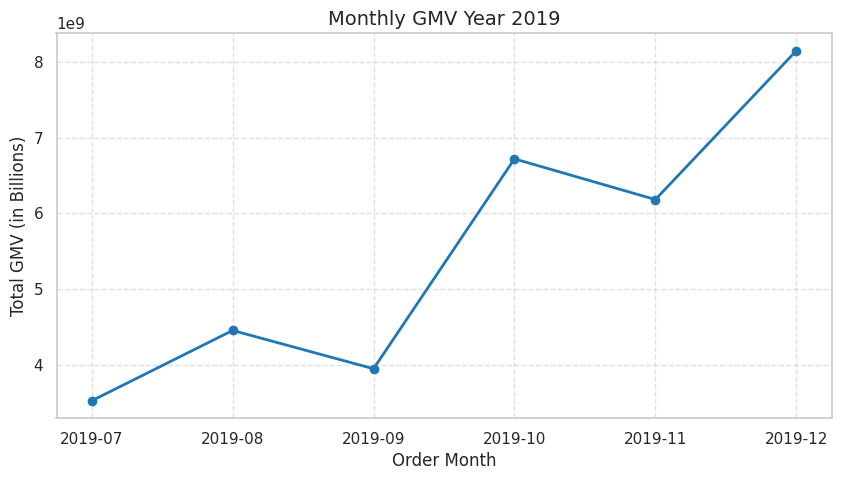

In [ ]:
# --- Import library ---
import matplotlib.pyplot as plt

# --- 1. Gunakan data agregat (df_agg) ---
# Pastikan df_agg sudah berisi kolom 'order_month' dan 'total_GMV'
# Jika belum, jalankan dulu langkah agregasi sebelumnya

# --- 2. Plot line chart ---
plt.figure(figsize=(10,5))
plt.plot(df_agg['order_month'], df_agg['total_GMV'], marker='o', color='tab:blue', linewidth=2)

# --- 3. Tambahkan judul dan label ---
plt.title('Monthly GMV Year 2019', fontsize=14)
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total GMV (in Billions)', fontsize=12)

# --- 4. (Opsional) Tambahkan grid agar lebih rapi ---
plt.grid(True, linestyle='--', alpha=0.6)

# --- 5. Tampilkan chart ---
plt.show()

#  6. Mengubah Figure Size


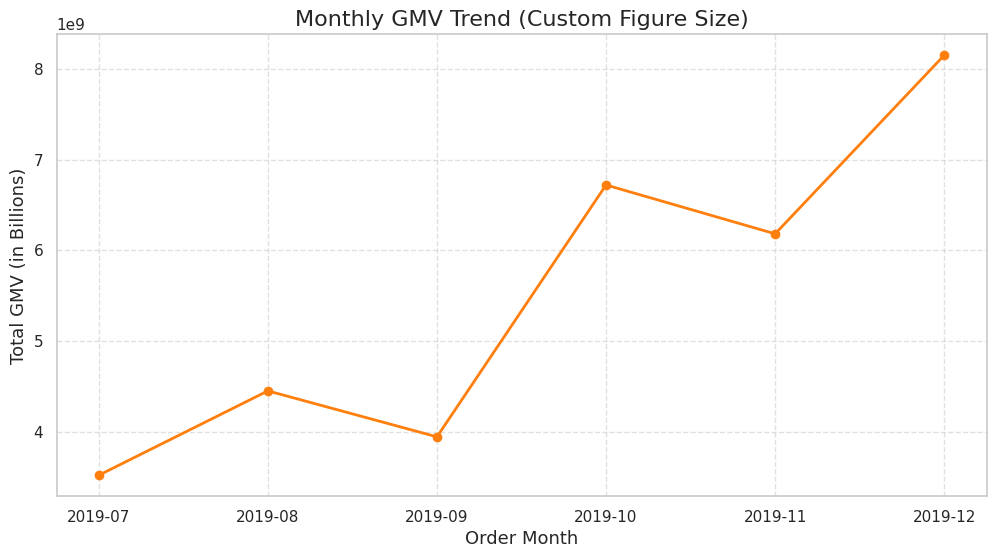

In [ ]:
# --- Ubah ukuran figure (contoh: 12x6 inch) ---
plt.figure(figsize=(12,6))  # Ubah nilai ini sesuai kebutuhan, misalnya (14,7) atau (8,4)

# --- Plot Line Chart Trend GMV ---
plt.plot(df_agg['order_month'], df_agg['total_GMV'], marker='o', color='tab:orange', linewidth=2)

# --- Tambahkan judul dan label ---
plt.title('Monthly GMV Trend (Custom Figure Size)', fontsize=16)
plt.xlabel('Order Month', fontsize=13)
plt.ylabel('Total GMV (in Billions)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)

# --- Tampilkan chart ---
plt.show()

#  7. Menanbahhkan Tittle dan label Axis


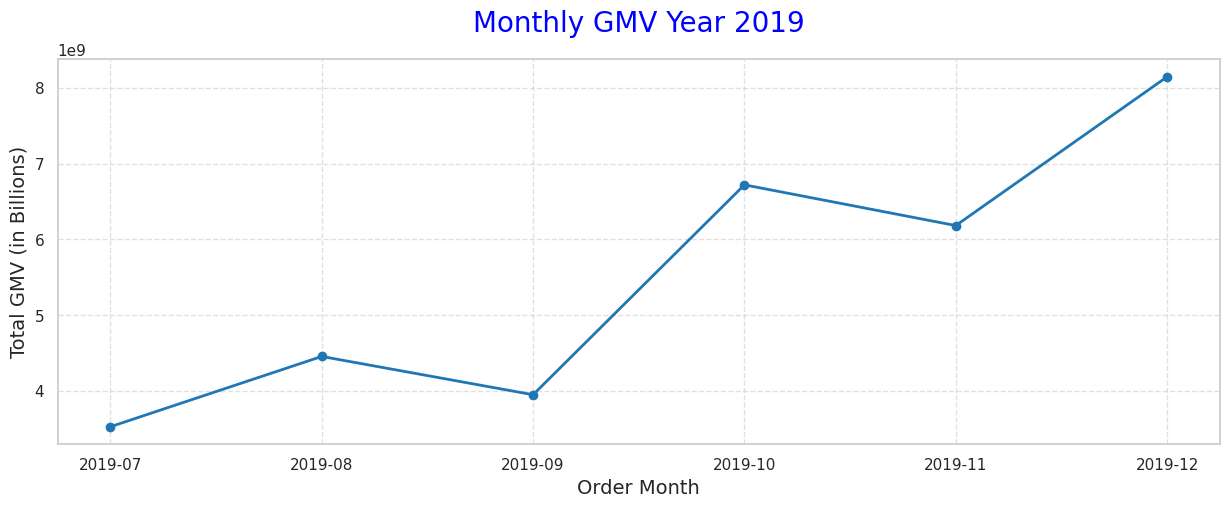

In [ ]:
# --- Atur ukuran figure ---
plt.figure(figsize=(15,5))

# --- Buat line chart total GMV per bulan ---
df.groupby(['order_month'])['GMV'].sum().plot(color='tab:blue', marker='o', linewidth=2)
# --- Tambahkan title dan label axis ---
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=14)
plt.ylabel('Total GMV (in Billions)', fontsize=14)

# --- Tampilkan grafik ---
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#  8. Modifikasi Line dan Point

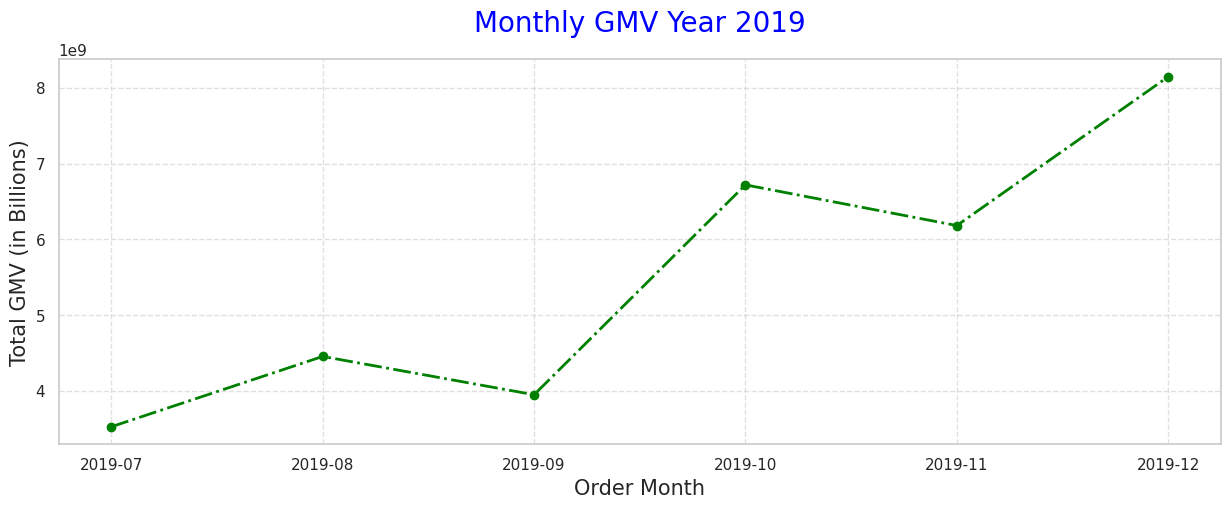

In [ ]:
# --- 1. Ubah ukuran figure ---
plt.figure(figsize=(15,5))

# --- 2. Plot total GMV per bulan dengan kustomisasi line dan point ---
df.groupby(['order_month'])['GMV'].sum().plot(
    color='green',        # warna garis
    marker='o',           # bentuk titik data (o = bulat)
    linestyle='-.',       # tipe garis (putus-putus kombinasi)
    linewidth=2           # ketebalan garis
)

# --- 3. Tambahkan judul dan label sumbu ---
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total GMV (in Billions)', fontsize=15)

# --- 4. Tambahkan grid agar rapi ---
plt.grid(True, linestyle='--', alpha=0.6)

# --- 5. Tampilkan grafik ---
plt.show()

In [ ]:
#  9. KUSTOMISASI LINE DAN POINT

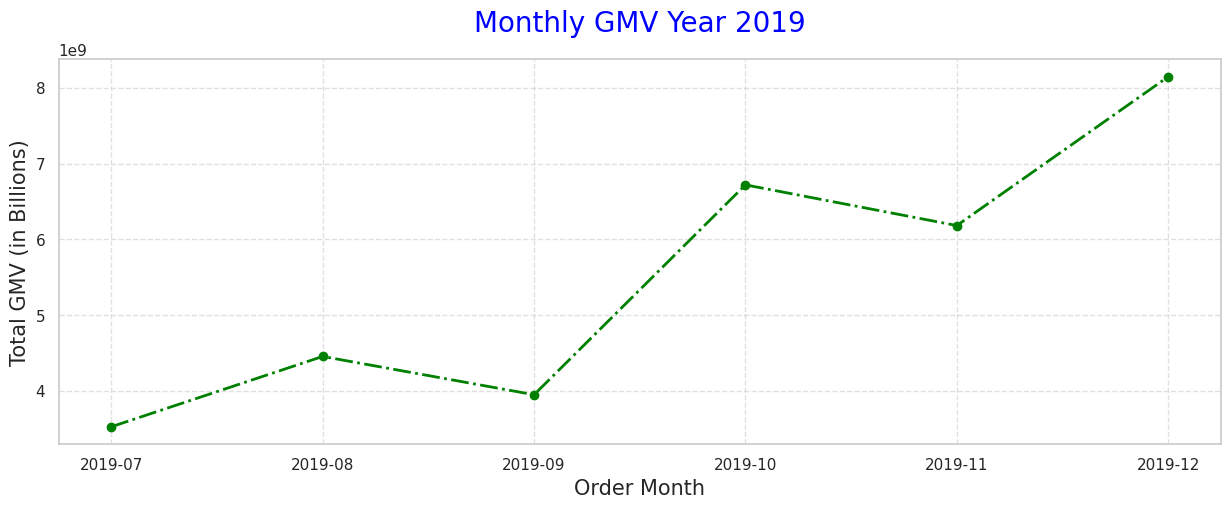

In [ ]:
# --- 1. Ubah ukuran figure ---
plt.figure(figsize=(15,5))

# --- 2. Plot line chart dengan kustomisasi warna, marker, dan style ---
df.groupby(['order_month'])['GMV'].sum().plot(
    color='green',      # warna garis
    marker='o',         # bentuk titik data
    linestyle='-.',     # jenis garis (putus-putus dengan titik)
    linewidth=2         # ketebalan garis
)

# --- 3. Tambahkan judul dan label sumbu ---
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total GMV (in Billions)', fontsize=15)

# --- 4. Tambahkan grid agar tampilan lebih rapi ---
plt.grid(True, linestyle='--', alpha=0.6)

# --- 5. Tampilkan hasil grafik ---
plt.show()

# 📈 10. KUSTOMISASI GRID


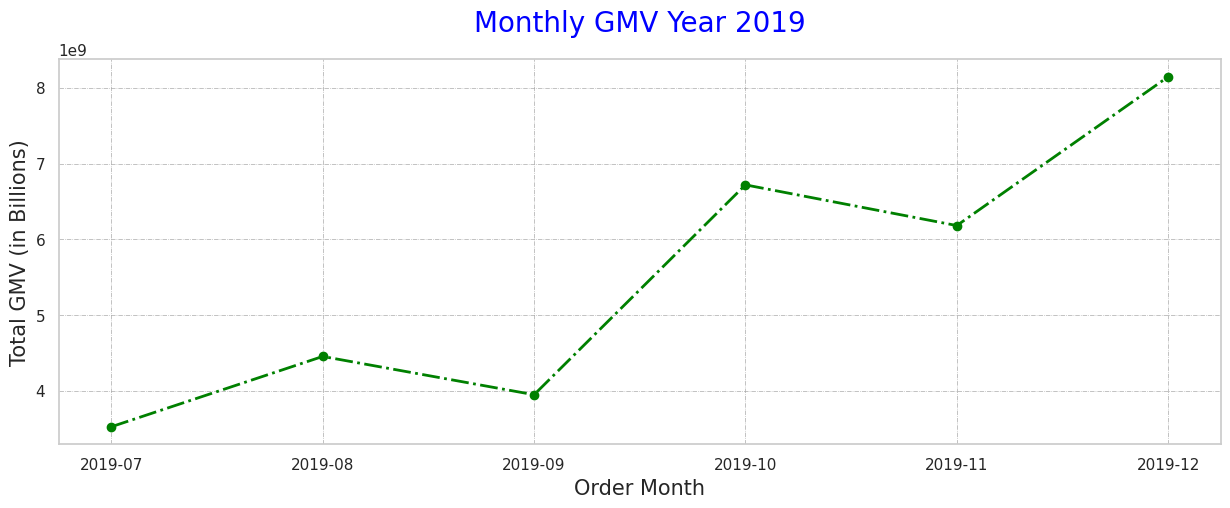

In [ ]:
# --- 1. Atur ukuran figure ---
plt.figure(figsize=(15,5))

# --- 2. Plot total GMV per bulan dengan kustomisasi garis dan titik ---
df.groupby(['order_month'])['GMV'].sum().plot(
    color='green',      # warna garis
    marker='o',         # bentuk titik data
    linestyle='-.',     # jenis garis
    linewidth=2         # ketebalan garis
)

# --- 3. Tambahkan judul dan label sumbu ---
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total GMV (in Billions)', fontsize=15)

# --- 4. Kustomisasi GRID ---
plt.grid(
    color='darkgray',   # warna grid
    linestyle='-.',     # jenis garis grid
    linewidth=0.5       # ketebalan garis grid
)

# --- 5. Tampilkan grafik ---
plt.show()

# 📈 11. MENAMBAHKAN INFORMASI PADA PLOT


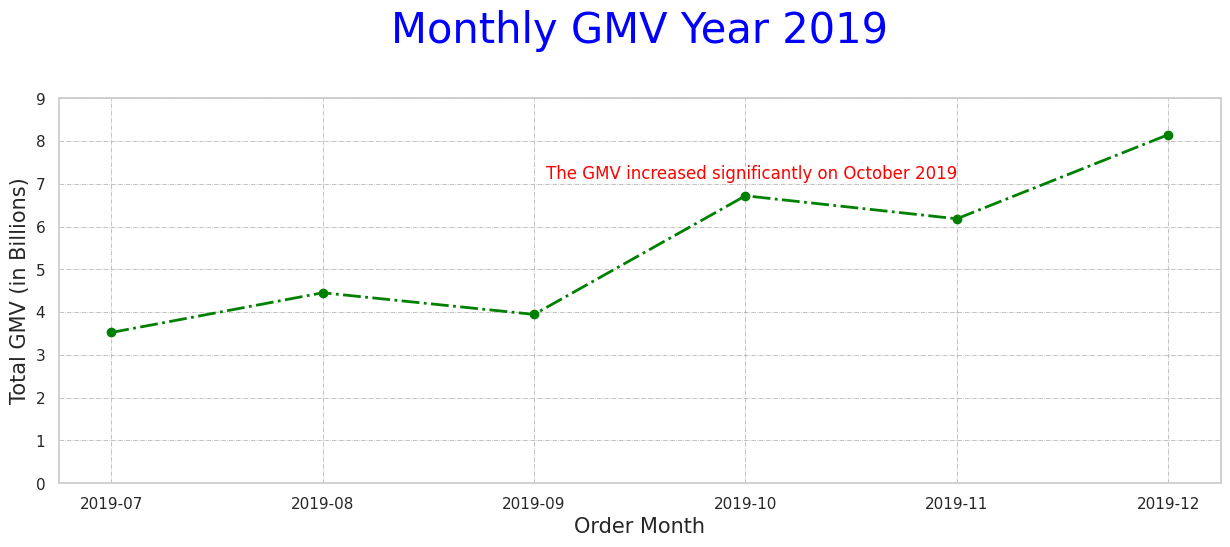

In [ ]:
# --- 1. Atur ukuran figure ---
plt.figure(figsize=(15,5))

# --- 2. Buat line chart total GMV per bulan ---
df.groupby(['order_month'])['GMV'].sum().plot(
    color='green',
    marker='o',
    linestyle='-.',
    linewidth=2
)

# --- 3. Tambahkan judul dan label sumbu ---
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=30, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total GMV (in Billions)', fontsize=15)

# --- 4. Kustomisasi grid ---
plt.grid(color='darkgray', linestyle='-.', linewidth=0.5)

# --- 5. Atur batas minimal sumbu Y agar mulai dari 0 ---
plt.ylim(ymin=0)

# --- 6. Ubah skala nilai sumbu Y agar lebih mudah dibaca (dari rupiah ke milyar) ---
labels, locations = plt.yticks()
plt.yticks(labels, (labels / 1_000_000_000).astype(int))  # ubah ke satuan milyar

# --- 7. Tambahkan teks informasi pada grafik ---
plt.text(
    0.45, 0.72,  # posisi teks relatif terhadap figure
    "The GMV increased significantly on October 2019",  # isi teks
    transform=plt.gcf().transFigure,  # posisinya relatif ke figure
    color='red', fontsize=12
)

# --- 8. Tampilkan grafik ---
plt.show()